In [254]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [61]:
import sklearn.datasets

df_data, sr_target = sklearn.datasets.fetch_california_housing(
    return_X_y=True, as_frame=True)

In [10]:
df_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [62]:
from sklearn.model_selection import train_test_split

# sr_target = np.log1p(sr_target)

X_train, X_test, y_train, y_test = train_test_split(df_data, sr_target)

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

In [67]:
%%time

train_errors = []
test_errors = []

for n_estimators in np.linspace(1, 5000, 10).astype(int):
    model = xgb.XGBRFRegressor(n_estimators=n_estimators)
#     model = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    err = mean_squared_error(y_test, y_pred)
#     err = mean_absolute_error(y_test, y_pred)
    train_errors.append(err)
    
    model = xgb.XGBRFRegressor(n_estimators=n_estimators)
#     model = RandomForestRegressor(n_estimators=n_estimators, n_jobs=-1)
    model.fit(X_test, y_test)
    
    y_pred = model.predict(X_test)
    err = mean_squared_error(y_test, y_pred)
#     err = mean_absolute_error(y_test, y_pred)
    test_errors.append(err)
    
pd.Series(train_errors).plot();
pd.Series(test_errors).plot();

CPU times: user 17min 59s, sys: 14.2 s, total: 18min 14s
Wall time: 6min 2s


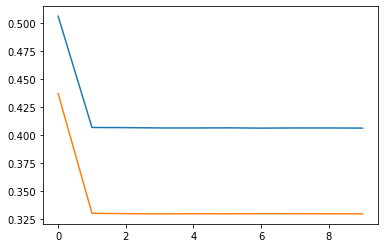

CPU times: user 54.3 s, sys: 1.16 s, total: 55.4 s
Wall time: 18.1 s


<AxesSubplot:>

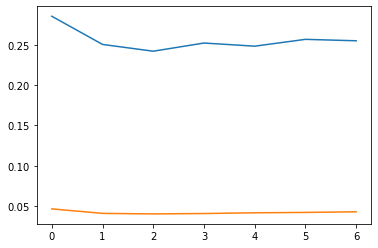

In [70]:
%%time

train_errors = []
test_errors = []

# for n_features in np.linspace(1, 8, 10).astype(int):
for n_features in range(1, 8):
    model = RandomForestRegressor(max_features=n_features, n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    err = mean_squared_error(y_test, y_pred)
    train_errors.append(err)
    
    model = RandomForestRegressor(max_features=n_features, n_jobs=-1)
    model.fit(X_test, y_test)
    
    y_pred = model.predict(X_test)
    err = mean_squared_error(y_test, y_pred)
    test_errors.append(err)
    
pd.Series(train_errors).plot();
pd.Series(test_errors).plot();

In [171]:
from sklearn.datasets import load_digits

# df_data, sr_target = load_digits(return_X_y=True, as_frame=True)

from sklearn.datasets import make_classification

df_data, sr_target = make_classification(n_samples=10000, n_features=100, n_classes=5, n_informative=5)
# df_data, sr_target = make_classification(n_samples=1000, n_features=100)
X_train, X_test, y_train, y_test = train_test_split(df_data, sr_target)

In [172]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss

model = RandomForestClassifier(max_features=20, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_test)
log_loss(y_test, y_pred)

CPU times: user 15.1 s, sys: 78.1 ms, total: 15.1 s
Wall time: 4.41 s


0.8588372720208619

CPU times: user 1h 18min 45s, sys: 19.5 s, total: 1h 19min 4s
Wall time: 23min 12s


<AxesSubplot:>

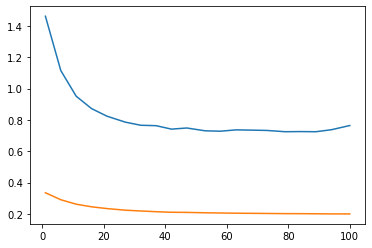

In [173]:
%%time

train_errors = []
test_errors = []
index = []

for n_features in np.linspace(1, 100, 20).astype(int):
# for n_estimators in np.linspace(1, 500, 10).astype(int):
#     n_features = None
    n_estimators = 500
    
    print(n_estimators, n_features)
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_features=n_features, n_jobs=-1)
    model.fit(X_train, y_train)
    
    y_pred = model.predict_proba(X_test)
    err = log_loss(y_test, y_pred)
    train_errors.append(err)
    
    model = RandomForestClassifier(n_estimators=n_estimators, max_features=n_features, n_jobs=-1)
    model.fit(X_test, y_test)
    
    y_pred = model.predict_proba(X_test)
    err = log_loss(y_test, y_pred)
    test_errors.append(err)
    
    index.append(n_features)
    
pd.Series(train_errors, index=index).plot();
pd.Series(test_errors, index=index).plot();

In [252]:
import pickle

def unpickle(file):
    with open(file, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
    return batch

batch_1 = unpickle(f'{cifar_data_path}/cifar-10-batches-py/data_batch_1')
batch_2 = unpickle(f'{cifar_data_path}/cifar-10-batches-py/data_batch_2')
batch_3 = unpickle(f'{cifar_data_path}/cifar-10-batches-py/data_batch_3')
batch_4 = unpickle(f'{cifar_data_path}/cifar-10-batches-py/data_batch_4')
batch_5 = unpickle(f'{cifar_data_path}/cifar-10-batches-py/data_batch_5')

test_batch = unpickle(f'{cifar_data_path}/cifar-10-batches-py/test_batch')

df_cifar_test = pd.DataFrame(test_batch[b'data'])
df_batch_1 = pd.DataFrame(batch_1[b'data'])
df_batch_2 = pd.DataFrame(batch_2[b'data'])
df_batch_3 = pd.DataFrame(batch_3[b'data'])
df_batch_4 = pd.DataFrame(batch_4[b'data'])
df_batch_5 = pd.DataFrame(batch_5[b'data'])

sf_cifar_test = pd.Series(test_batch[b'labels'])
sf_batch_1 = pd.Series(batch_1[b'labels'])
sf_batch_2 = pd.Series(batch_2[b'labels'])
sf_batch_3 = pd.Series(batch_3[b'labels'])
sf_batch_4 = pd.Series(batch_4[b'labels'])
sf_batch_5 = pd.Series(batch_5[b'labels'])

In [190]:
df_batch_5.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,255,252,253,250,238,233,245,241,232,238,...,254,253,253,252,252,231,172,173,231,248
1,127,126,127,127,128,128,128,128,129,130,...,108,103,97,95,88,81,89,102,108,112
2,116,64,19,29,36,40,57,143,173,83,...,59,32,17,10,9,10,8,7,6,5
3,205,213,235,232,112,98,95,80,98,224,...,25,23,25,25,26,23,23,24,25,23
4,189,184,181,186,191,177,186,167,147,161,...,77,75,77,74,75,76,72,76,77,72


In [192]:
sf_batch_1.head()

0    6
1    9
2    9
3    4
4    1
dtype: int64

In [237]:
df_cifar_features = df_batch_1.append(
    [df_batch_2, df_batch_3, df_batch_4, df_batch_5], ignore_index=True)

df_cifar_target = sf_batch_1.append(
    [sf_batch_2, sf_batch_3, sf_batch_4, sf_batch_5], ignore_index=True)

X_train shape: (500, 500)
X_train shape: (2500, 500)
X_train shape: (5000, 500)
X_train shape: (7500, 500)
X_train shape: (10000, 500)
X_train shape: (15000, 500)
X_train shape: (20000, 500)
X_train shape: (25000, 500)
CPU times: user 9min 54s, sys: 6.24 s, total: 10min 1s
Wall time: 3min 20s


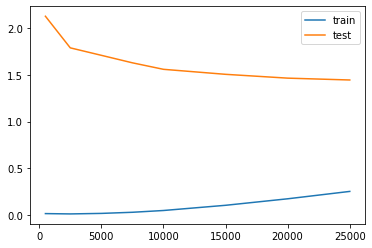

In [270]:
%%time

# use only small parts of columns
num_columns = 500
columns = np.random.choice(
    df_cifar_features.columns.values, num_columns, replace=False)

train_errors = []
test_errors = []
index = []

for pcnt in [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]:
    n_rows = int(len(df_cifar_features) * pcnt)
    index.append(n_rows)

    idxs = np.random.choice(df_cifar_features.index, n_rows, replace=False)

    X_train = df_cifar_features[columns].iloc[idxs]
    y_train = df_cifar_target.iloc[idxs]
    X_test = df_cifar_test[columns]
    y_test = sf_cifar_test

    print(f'X_train shape: {X_train.shape}')

    model = xgb.XGBClassifier(use_label_encoder=False,
                              colsample_bytree=0.1, verbosity=0)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_test)
    err = log_loss(y_test, y_pred)
    test_errors.append(err)

    y_pred = model.predict_proba(X_train)
    err = log_loss(y_train, y_pred)
    train_errors.append(err)

pd.Series(train_errors, index=index).plot(label='train')
pd.Series(test_errors, index=index).plot(label='test')
plt.legend()

X_train shape: (500, 1000)
X_train shape: (2500, 1000)
X_train shape: (5000, 1000)
X_train shape: (7500, 1000)
X_train shape: (10000, 1000)
X_train shape: (15000, 1000)
X_train shape: (20000, 1000)
X_train shape: (25000, 1000)
CPU times: user 17min 49s, sys: 7.92 s, total: 17min 57s
Wall time: 5min 39s


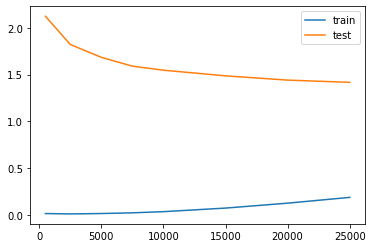

In [271]:
%%time

# use only small parts of columns
num_columns = 1000
columns = np.random.choice(
    df_cifar_features.columns.values, num_columns, replace=False)

train_errors = []
test_errors = []
index = []

for pcnt in [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]:
    n_rows = int(len(df_cifar_features) * pcnt)
    index.append(n_rows)

    idxs = np.random.choice(df_cifar_features.index, n_rows, replace=False)

    X_train = df_cifar_features[columns].iloc[idxs]
    y_train = df_cifar_target.iloc[idxs]
    X_test = df_cifar_test[columns]
    y_test = sf_cifar_test

    print(f'X_train shape: {X_train.shape}')

    model = xgb.XGBClassifier(use_label_encoder=False,
                              colsample_bytree=0.1, verbosity=0)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_test)
    err = log_loss(y_test, y_pred)
    test_errors.append(err)

    y_pred = model.predict_proba(X_train)
    err = log_loss(y_train, y_pred)
    train_errors.append(err)

pd.Series(train_errors, index=index).plot(label='train')
pd.Series(test_errors, index=index).plot(label='test')
plt.legend()

## Links

https://blog.ml.cmu.edu/2020/08/31/4-overfitting/
https://deepai.org/publication/early-stopping-in-deep-networks-double-descent-and-how-to-eliminate-it
https://github.com/lightonai/double-descent-curve/blob/master/plot.ipynb
https://medium.com/@LightOnIO/beyond-overfitting-and-beyond-silicon-the-double-descent-curve-18b6d9810e1b
https://towardsdatascience.com/learning-theory-empirical-risk-minimization-d3573f90ff77
https://openai.com/blog/deep-double-descent/
https://www.alignmentforum.org/s/r9tYkB2a8Fp4DN8yB?_ga=2.31227581.303960759.1612083154-1163903255.1611688902
https://www.lesswrong.com/s/r9tYkB2a8Fp4DN8yB/p/q2rCMHNXazALgQpGH
https://www.lesswrong.com/posts/FRv7ryoqtvSuqBxuT/understanding-deep-double-descent